#Overview of the material learned in class this semester

In [11]:
import math

In [12]:
L = [5554,6296,5590,5707,5496,5027,5469,5817,5434,5610]
print(sum(L))

56000


In [13]:
Fi = [f/sum(L) for f in L]
Gini = sum([f*(1-f) for f in Fi])
print((Gini))

0.8997037206632652


In [14]:
#Now Entrophy!

In [15]:
Fi = [f/sum(L) for f in L]
ent = sum([-1*f*math.log(f,2) for f in Fi])

In [16]:
print((ent))

3.3198076417940654


In [17]:
#Now information gain

In [18]:
Left= [5013,541,4435,1153,5006,2965,4393,5342,2795,4484]
print(sum(Left))
Fi = [f/sum(L) for f in L]
LeftGini = sum([f*(1-f) for f in Fi])
print((LeftGini))

36127
0.8997037206632652


In [19]:
Right = [451,5755,1155,4554,490,2062,1076,475,2639,1126]
print(sum(Right))
Fi = [f/sum(Right) for f in Right]
RightGini = sum([f*(1-f) for f in Fi])
print((RightGini))

19783
0.8224073741673256


In [20]:
SplitGini = LeftGini* (sum(Left)/sum(L))+RightGini*(sum(Right)/sum(L))
print(SplitGini)
print("Information Gain = ", Gini - SplitGini)
print(Gini)

0.8709514535634639
Information Gain =  0.028752267099801276
0.8997037206632652


#Decision Tree Regressor

In [21]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import os
import tarfile
from six.moves import urllib

import pandas as pd

In [22]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

print (HOUSING_URL)
print (HOUSING_PATH)
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz
datasets\housing


In [23]:
fetch_housing_data()
housing = pd.read_csv("datasets/housing/housing.csv")
print (housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [24]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

print( "\nTraining Percentages:\n" )
print(train_set.count()/housing.count())


Training Percentages:

longitude             0.800000
latitude              0.800000
housing_median_age    0.800000
total_rooms           0.800000
total_bedrooms        0.808105
population            0.800000
households            0.800000
median_income         0.800000
median_house_value    0.800000
ocean_proximity       0.800000
dtype: float64


In [25]:
housing_labels = train_set["median_house_value"].copy()

housing_m = housing["median_income"].copy()
print(type(housing_m))
print (housing_m.describe())

print (housing_labels.describe())

<class 'pandas.core.series.Series'>
count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64
count     16512.000000
mean     207194.693738
std      115622.626448
min       14999.000000
25%      119800.000000
50%      179850.000000
75%      265125.000000
max      500001.000000
Name: median_house_value, dtype: float64


In [26]:
housing_labels = train_set["median_house_value"].copy()
print (housing_labels.describe())

housing_m = housing["median_income"].copy()
print(type(housing_m))
print (housing_m.describe())


count     16512.000000
mean     207194.693738
std      115622.626448
min       14999.000000
25%      119800.000000
50%      179850.000000
75%      265125.000000
max      500001.000000
Name: median_house_value, dtype: float64
<class 'pandas.core.series.Series'>
count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64


In [27]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
housing = train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = train_set["median_house_value"].copy()
housing_m = housing["median_income"].copy()


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

det_reg = DecisionTreeRegressor(min_samples_leaf=100)
#det_reg = DecisionTreeRegressor()
lin_reg = LinearRegression()
train_m=housing_m.values
train_m=train_m.reshape(-1,1)
print(train_m.shape)
train_labels=housing_labels.values
lin_reg.fit(train_m, train_labels)

det_reg.fit(train_m, train_labels)

(16512, 1)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=100,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [29]:
from sklearn.metrics import mean_squared_error

housing_test = test_set.drop("median_house_value", axis=1) # drop labels for training set
housing_test_labels = test_set["median_house_value"].copy()

housing_test_m = housing_test["median_income"].values.reshape(-1,1)

housing_test_m.sort()
lin_housing_predictions = lin_reg.predict(housing_test_m)
lin_mse = mean_squared_error(housing_test_labels, lin_housing_predictions)
lin_rmse = np.sqrt(lin_mse)

det_housing_predictions = det_reg.predict(housing_test_m)
det_mse = mean_squared_error(housing_test_labels, det_housing_predictions)
det_rmse = np.sqrt(det_mse)
print(det_rmse)

print(lin_rmse)

83780.2103541
84209.0124141


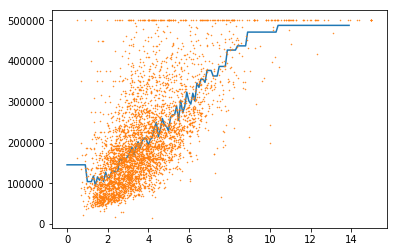

In [30]:
x = np.arange(0,14,0.1)
x = x.reshape(-1,1)
det_housing_predictions = det_reg.predict(x)
plt.plot(x, det_housing_predictions, "-")
plt.plot(housing_test_m, housing_test_labels,".",markersize =1)
plt.show()

#My attempt at the MNIST assignment

In [58]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

In [59]:
# Import test and train datasets
#df stands for data frame
df_train = pd.read_csv('datasets/mnist/train.csv')
df_test = pd.read_csv('datasets//mnist/test.csv')

In [60]:
#split dataframe into data and label
x = df_train.drop('label', axis = 1)
y = df_train['label']

#split training data into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.8, random_state = 31)

In [61]:
#test on data with decision tree classifier
from sklearn.tree import DecisionTreeClassifier

DTclassifier = DecisionTreeClassifier(max_depth=5)
DTclassifier.fit(x_train,y_train)

print(DTclassifier.score(x_test,y_test))

0.661279761905


In [62]:
#to make it easier and more simple changing values that are greater to zero to one
# else zero
x_train = x_train.applymap(lambda x: 1 if x > 0 else 0)
x_test = x_test.applymap(lambda x: 1 if x > 0 else 0)


In [63]:
#rerun test with simplified data
DTclassifier = DecisionTreeClassifier(max_depth=5)
DTclassifier.fit(x_train,y_train)

print(DTclassifier.score(x_test,y_test))

0.675803571429


In [64]:
#This will run on the data with logistic regression
from sklearn.linear_model import LogisticRegression

Newmodel = LogisticRegression()
Newmodel.fit(x_train,y_train)

print(Newmodel.score(x_test,y_test))

0.8875


In [65]:
#This will make it simplier as I did with the training data
df_test.applymap(lambda x: 1 if x > 0 else 0)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
#this will predict results of the test data that was used with logistic regression
First_result = Newmodel.predict(df_test)
First_result = pd.DataFrame(First_result)
First_result.index+=1
First_result.index.name='ImageId'
First_result.columns=['Label']
First_result.to_csv('datasets/mnist/First_result.csv',header=True)

In [67]:
#Titanic Assignment 

In [68]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

In [69]:
# Import test and train datasets
#df stands for data frame
df_train = pd.read_csv('datasets/titanic/train.csv')
df_test = pd.read_csv('datasets/titanic/test.csv')

# View first lines of training data
print (df_train.shape)
print(df_train.count())
#print (df_train.info())
#df_train.head(n=4)

(891, 12)
PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64


<function matplotlib.pyplot.show>

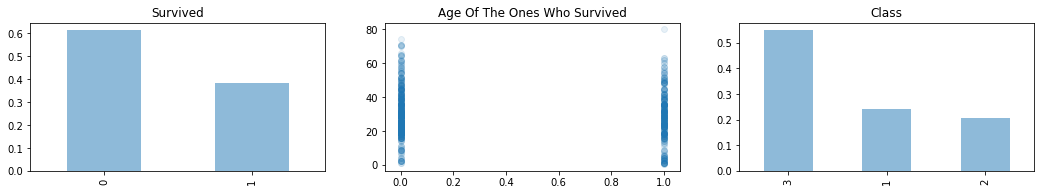

In [70]:
fig = plt.figure(figsize=(18,6))


plt.subplot2grid((2,3),(0,0))
df_train.Survived.value_counts(normalize=True).plot(kind="bar", alpha = 0.5)
plt.title("Survived")

plt.subplot2grid((2,3),(0,1))
plt.scatter(df_train.Survived,df_train.Age,alpha=0.1)
plt.title("Age Of The Ones Who Survived")

plt.subplot2grid((2,3),(0,2))
df_train.Pclass.value_counts(normalize=True).plot(kind="bar", alpha = 0.5)
plt.title("Class")

plt.show
#this data will show the deceased(0) and survived(1)
#and it will show the percentage of these people of the deceased and the ones who survived



<function matplotlib.pyplot.show>

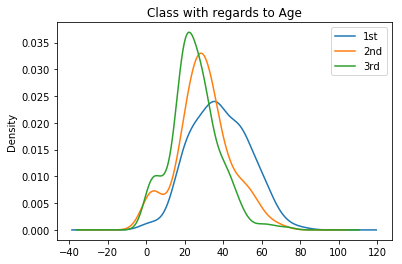

In [71]:
#plt.subplot2grid((2,3), (1,0), colspan = 2)
for x in [1,2,3]:
    df_train.Age[df_train.Pclass ==x ].plot(kind="kde")
plt.title("Class with regards to Age")
plt.legend(("1st","2nd","3rd"))

plt.show

<function matplotlib.pyplot.show>

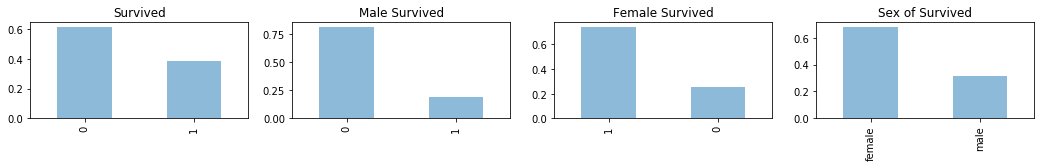

In [72]:
fig = plt.figure(figsize=(18,6))

plt.subplot2grid((3,4),(0,0))
df_train.Survived.value_counts(normalize=True).plot(kind="bar", alpha = 0.5)
plt.title("Survived")

plt.subplot2grid((3,4),(0,1))
df_train.Survived[df_train.Sex == "male"].value_counts(normalize=True).plot(kind="bar", alpha = 0.5)
plt.title("Male Survived")

plt.subplot2grid((3,4),(0,2))
df_train.Survived[df_train.Sex == "female"].value_counts(normalize=True).plot(kind="bar", alpha = 0.5)
plt.title("Female Survived")

plt.subplot2grid((3,4),(0,3))
df_train.Sex[df_train.Survived==1].value_counts(normalize=True).plot(kind="bar", alpha = 0.5)
plt.title("Sex of Survived")

plt.show
#looking at the data and seeing the percentages of male and females survived and the sex of the survived

Text(0.5,1,'Survived')

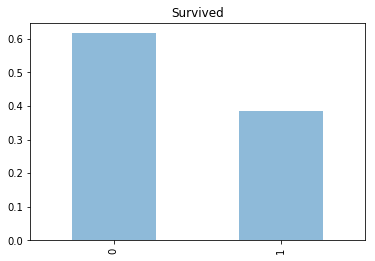

In [73]:
df_train.Survived.value_counts(normalize=True).plot(kind="bar", alpha = 0.5)
plt.title("Survived")


Text(0.5,1,'Poor Men That Survived')

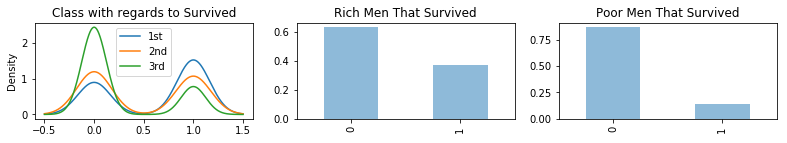

In [74]:
fig = plt.figure(figsize=(18,6))
plt.subplot2grid((3,4),(0,0))
for x in [1,2,3]:
    df_train.Survived[df_train.Pclass ==x ].plot(kind="kde")
plt.title("Class with regards to Survived")
plt.legend(("1st","2nd","3rd"))

plt.subplot2grid((3,4),(0,1))
df_train.Survived[(df_train.Sex == "male")&(df_train.Pclass==1)].value_counts(normalize=True).plot(kind="bar", alpha = 0.5)
plt.title("Rich Men That Survived")

plt.subplot2grid((3,4),(0,2))
df_train.Survived[(df_train.Sex == "male")&(df_train.Pclass==3)].value_counts(normalize=True).plot(kind="bar", alpha = 0.5)
plt.title("Poor Men That Survived")

Text(0.5,1,'Poor Women That Survived')

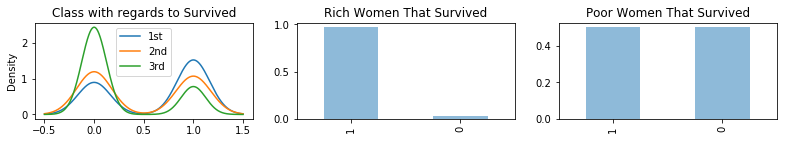

In [75]:
fig = plt.figure(figsize=(18,6))
plt.subplot2grid((3,4),(0,0))
for x in [1,2,3]:
    df_train.Survived[df_train.Pclass ==x ].plot(kind="kde")
plt.title("Class with regards to Survived")
plt.legend(("1st","2nd","3rd"))

plt.subplot2grid((3,4),(0,1))
df_train.Survived[(df_train.Sex == "female")&(df_train.Pclass==1)].value_counts(normalize=True).plot(kind="bar", alpha = 0.5)
plt.title("Rich Women That Survived")

plt.subplot2grid((3,4),(0,2))
df_train.Survived[(df_train.Sex == "female")&(df_train.Pclass==3)].value_counts(normalize=True).plot(kind="bar", alpha = 0.5)
plt.title("Poor Women That Survived")

In [76]:
df_train = df_train.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
df_train['Sex'] = df_train['Sex'].map({'male':0, 'female':1})
df_train = df_train.dropna()



print(df_train.info())
df_train.head(n=5)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Sex            714 non-null int64
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Fare           714 non-null float64
dtypes: float64(2), int64(6)
memory usage: 50.2 KB
None


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,22.0,1,0,7.2500
1,2,1,1,1,38.0,1,0,71.2833
2,3,1,3,1,26.0,0,0,7.9250
3,4,1,1,1,35.0,1,0,53.1000
4,5,0,3,0,35.0,0,0,8.0500


In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

x = df_train.drop('Survived',axis=1)
y = df_train['Survived']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

classifier = DecisionTreeClassifier(max_depth=5)
classifier.fit(x_train, y_train)

print (classifier.score(x_test,y_test))

0.748837209302


#Used the DecisionTreeClassifier on training set

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001CFF7F4FB00>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001CF9EA76A58>], dtype=object)

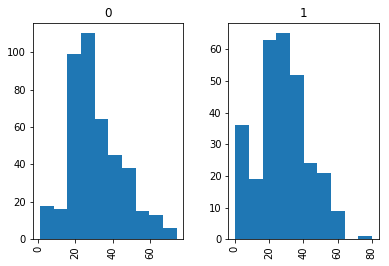

In [78]:
df_train.hist(column='Age',by=df_train['Survived'])

In [79]:
df_train['Age'] = df_train.Age.apply(lambda x: 0 if x <= 16 else (1 if x <= 40 else 2))
print(df_train.info())
df_train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Sex            714 non-null int64
Age            714 non-null int64
SibSp          714 non-null int64
Parch          714 non-null int64
Fare           714 non-null float64
dtypes: float64(1), int64(7)
memory usage: 70.2 KB
None


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,1,1,0,7.2500
1,2,1,1,1,1,1,0,71.2833
2,3,1,3,1,1,0,0,7.9250
3,4,1,1,1,1,1,0,53.1000
4,5,0,3,0,1,0,0,8.0500


In [80]:

x = df_train.drop('Survived',axis=1)
y = df_train['Survived']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

classifier = DecisionTreeClassifier(max_depth=5)
classifier.fit(x_train, y_train)

print (classifier.score(x_test,y_test))

0.781395348837


#simplying age seems to improve the accuracy of the data

In [81]:
#Fare info gave same results so I dropped it.
df_train = df_train.drop('Fare', axis=1)

In [82]:
x = df_train.drop('Survived',axis=1)
y = df_train['Survived']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

classifier = DecisionTreeClassifier(max_depth=5)
classifier.fit(x_train, y_train)

print (classifier.score(x_test,y_test))

0.827906976744


In [83]:
df_test = df_test.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
df_test['Sex'] = df_test['Sex'].map({'male':0, 'female':1})
df_test['Age'] = df_test.Age.apply(lambda x: 0 if x <= 16 else (1 if x <= 40 else 2))
df_test = df_test.drop('Fare', axis=1)

print(df_test.info())
df_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null int64
SibSp          418 non-null int64
Parch          418 non-null int64
dtypes: int64(6)
memory usage: 19.7 KB
None


,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,0,1,0,0
1,893,3,1,2,1,0
2,894,2,0,2,0,0
3,895,3,0,1,0,0
4,896,3,1,1,1,1


In [84]:
test_pred = classifier.predict(df_test)
df_test['Survived'] = test_pred
results = df_test[['PassengerId', 'Survived']]
print(results.info())
results.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
dtypes: int64(2)
memory usage: 6.6 KB
None


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [ ]:
results.to_csv('datasets/titanic/result.csv',index = False)